In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from __future__ import division
from operator import truediv
import copy
import random

In [44]:
def propagate_plot(Te, mu, dx, M, yy, T, f):
    dt = dx/((Te/mu)**(.5))
    r = (Te/mu)**(1/2) *dt/dx
    
    y = np.copy(yy)
    #print dt
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(0,1,.01), y[0])

    plt.plot(np.arange(0,1,.01), y[1])

    for t in range(0,T):
        #print(t)
        for i in range(1,M-2):
            y[2][0] = np.sin(2*np.pi*f * t*dt)
            y[2][M-1] = 0
            y[2][i] = 2*(1-r**2)*y[2-1][i] - y[0][i] + r**2*(y[1][i+1] + y[1][i-1])
            y[2][0] = np.sin(2*np.pi*f * t*dt)
            y[2][M-1] = 0
        y[0] = y[1]
        y[1] = y[2]
        if(t > int(T/2)):
            plt.plot(np.arange(0,1,.01), y[2])
    plt.xlabel('Position (m)')
    plt.ylabel('Displacement (m)')
    #plt.savefig('standing_4_anti.png', bbox_inches='tight', dpi = 1000)
    return y

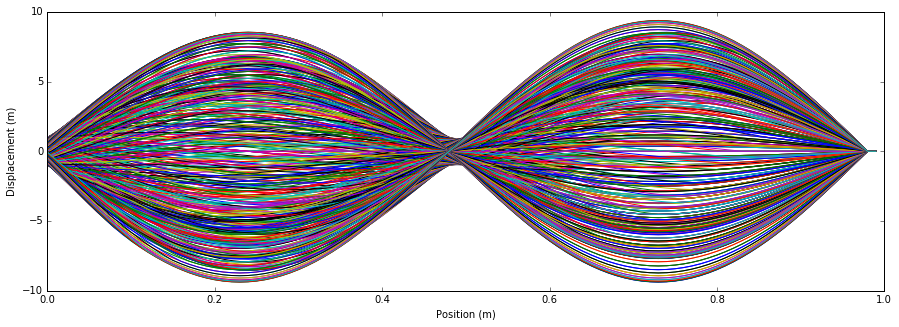

In [39]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0

TT = propagate_plot(900, .01, .01, 100, y, 1000, 4*300/(4))

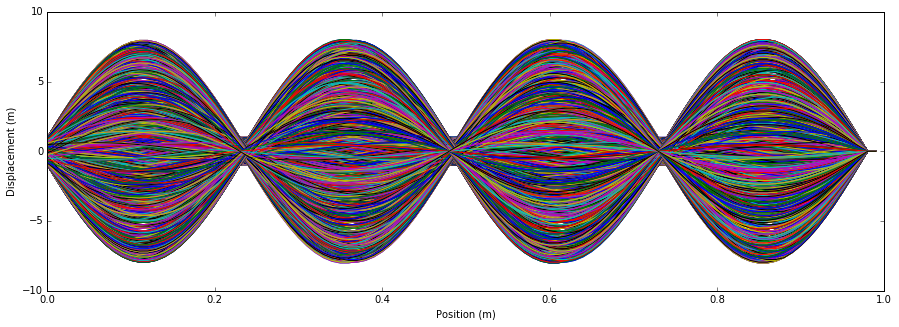

In [45]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0


TTT = propagate_plot(900, .01, .01, 100, y, 9000, 4*300/(2))

In [5]:
def propagate_b(Te, mu, dx, M, yy, T, f):
    dt = dx/((Te/mu)**(.5))
    r = (Te/mu)**(1/2) *dt/dx
    
    y = np.copy(yy)
    #print dt
#    plt.figure(figsize=(15,5))

    for t in range(0,T):
        #print(t)
        for i in range(1,M-2):
            y[2][0] = np.sin(2*np.pi*f * t*dt)
            y[2][M-1] = 0
            y[2][i] = 2*(1-r**2)*y[2-1][i] - y[0][i] + r**2*(y[1][i+1] + y[1][i-1])
            y[2][0] = np.sin(2*np.pi*f * t*dt)
            y[2][M-1] = 0
        y[0] = y[1]
        y[1] = y[2]

#    plt.plot(np.arange(0,1,.01), y[2])
#    plt.show()
    return y

In [6]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0


prop_b_initial = propagate_b(900, .01, .01, 100, y, 0, 3*300/(2))

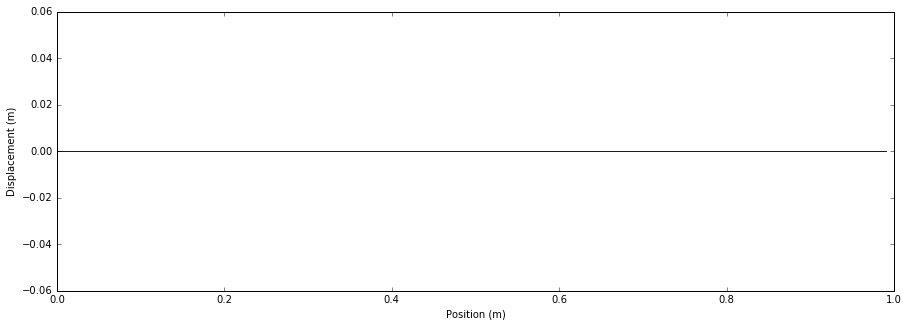

In [23]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,1,.01), prop_b_initial[2])
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
#plt.savefig('equilibrium.png', bbox_inches='tight', dpi = 1000)

In [8]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0


prop_b_mid = propagate_b(900, .01, .01, 100, y, 80, 3*300/(2))

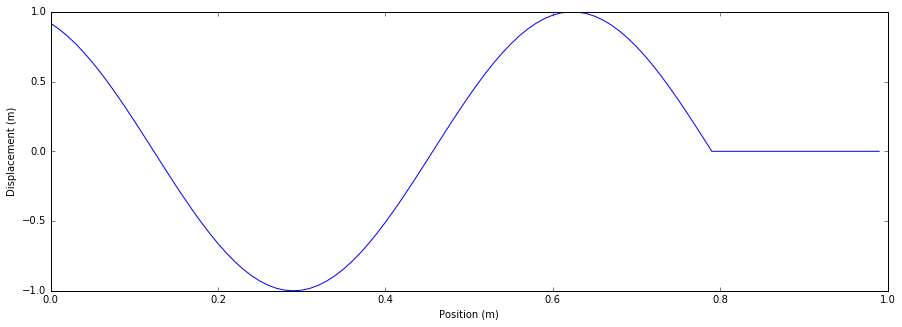

In [27]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,1,.01), prop_b_mid[2])
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
#plt.savefig('threequarters.png', bbox_inches='tight', dpi = 1000)

In [10]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0


prop_b_ref = propagate_b(900, .01, .01, 100, y, 150, 3*300/(2))

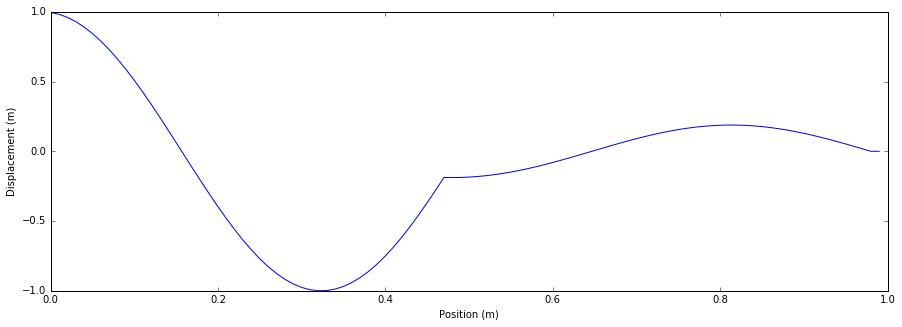

In [26]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,1,.01), prop_b_ref[2])
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
#plt.savefig('reflect.png', bbox_inches='tight', dpi = 1000)

In [30]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0


prop_b_long = propagate_b(900, .01, .01, 100, y, 14000, 3*300/(2))

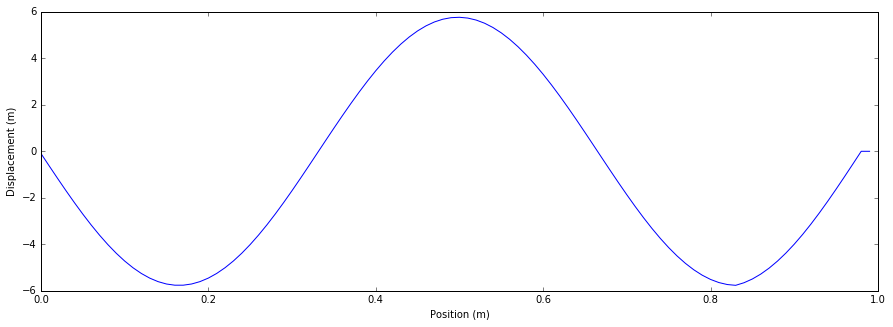

In [32]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,1,.01), prop_b_long[2])
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
#plt.savefig('simplestanding.png', bbox_inches='tight', dpi = 1000)

In [35]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0


prop_c = propagate_b(900, .01, .01, 100, y, 80, 7*300/(2))

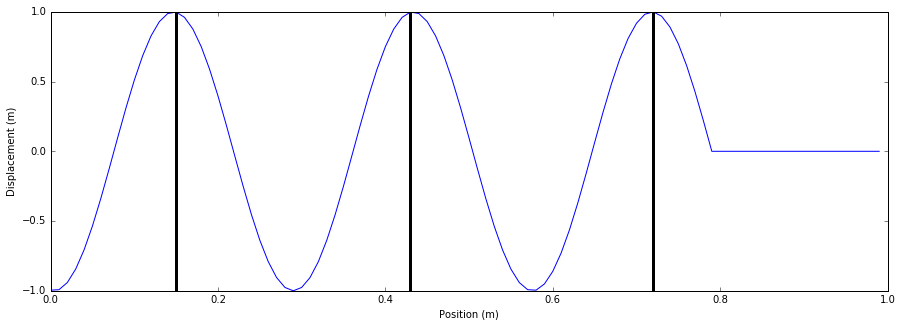

In [37]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,1,.01), prop_c[2])
plt.axvline(x=72*.01, linewidth = 3, color = 'black')
plt.axvline(x=15 *.01, linewidth = 3, color = 'black' )
plt.axvline(x=43 * .01, linewidth = 3, color = 'black')
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
plt.savefig('peaks.png', bbox_inches='tight', dpi = 1000)

In [16]:
m = max(prop_c[2])
locations = [i for i, j in enumerate(prop_c[2]) if j > m -.01]

In [17]:
print locations
print prop_c[2][72]
print 72 * .01
print prop_c[2][15]
print 15 * .01
print prop_c[2][43]
print 43 * .01
print m

[15, 43, 72]
0.999506560366
0.72
0.998026728428
0.15
0.998026728428
0.43
0.999506560366


In [21]:
def propagate_node(Te, mu, dx, M, yy, T, f, N):
    dt = dx/((Te/mu)**(.5))
    r = (Te/mu)**(1/2) *dt/dx
    node = np.zeros(T+2)
    
    y = np.copy(yy)
    #print dt
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(0,1,.01), y[0])
    node[0]= y[0][N]
    
    plt.plot(np.arange(0,1,.01), y[1])
    node[0]= y[0][N]
    
    for t in range(0,T):
        #print(t)
        for i in range(1,M-2):
            y[2][0] = np.sin(2*np.pi*f * t*dt)
            y[2][M-1] = 0
            y[2][i] = 2*(1-r**2)*y[2-1][i] - y[0][i] + r**2*(y[1][i+1] + y[1][i-1])
            y[2][0] = np.sin(2*np.pi*f * t*dt)
            y[2][M-1] = 0
        y[0] = y[1]
        y[1] = y[2]
        node[t+2] = y[2][N]
        if(t > int(T/2)):
            plt.plot(np.arange(0,1,.01), y[2])
    plt.xlabel('Position (m)')
    plt.ylabel('Displacement (m)')
    #plt.savefig('standing_4_anti.png', bbox_inches='tight', dpi = 1000)
    return node

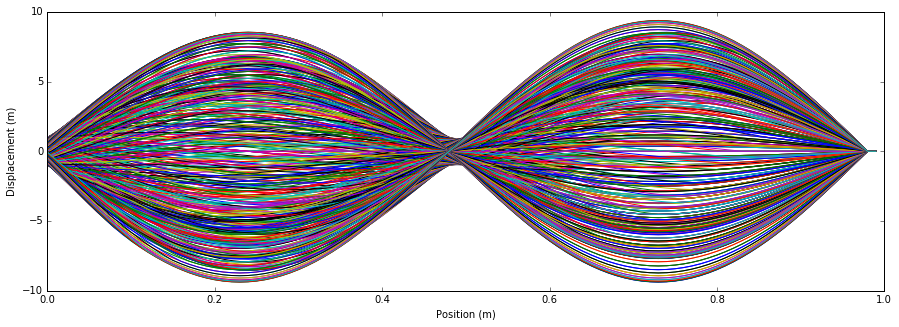

In [39]:
y = np.zeros((3,int(1/.01)))
x = np.arange(0,1,.01)
for i in np.arange(0,100):
    y[1][i] = 0
    y[0][i] = 0

node = propagate_node(900, .01, .01, 100, y, 1000, 4*300/(4),49)

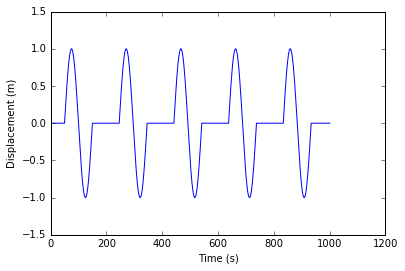

In [33]:
plt.plot(range(0,1002), node) #node at 48
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.savefig('node_48', bbox_inches='tight', dpi = 1000)

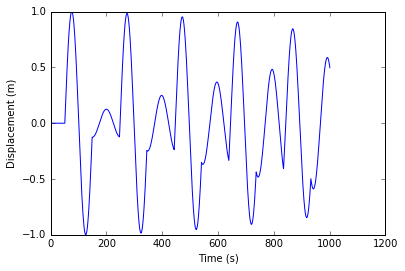

In [40]:
plt.plot(range(0,1002), node) #node at 49
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.savefig('node_49', bbox_inches='tight', dpi = 1000)

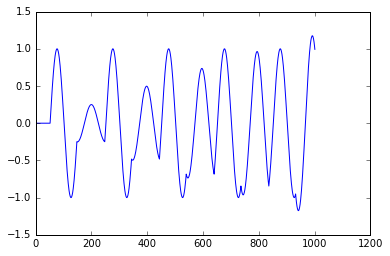

In [26]:
plt.plot(range(0,1002), node) #node at 50

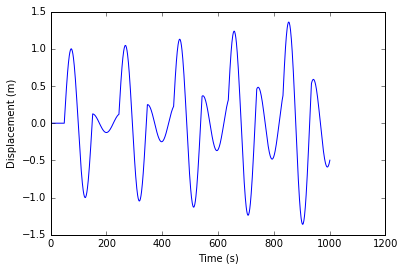

In [37]:
plt.plot(range(0,1002), node) #node at 47
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.savefig('node_47', bbox_inches='tight', dpi = 1000)